<a href="https://colab.research.google.com/github/ArandasSheikh/Supervised-Learning-Projects/blob/main/Heart_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Import required libraries for data processing and machine learning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [ ]:
# Load the heart disease dataset from CSV file


data = pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.shape

(1025, 14)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


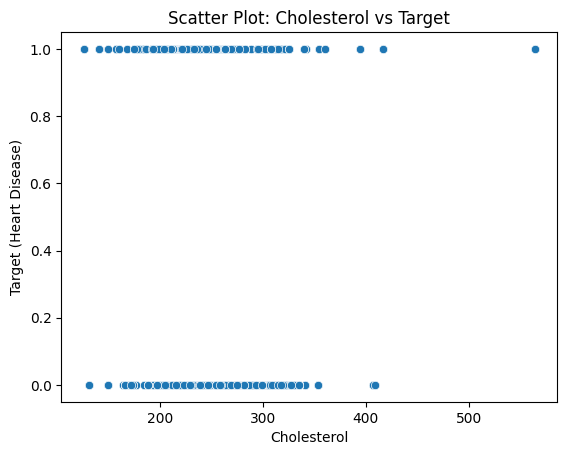

In [ ]:
plt.figure()
sns.scatterplot(
    x='chol',
    y='target',
    data=data
)
plt.xlabel("Cholesterol")
plt.ylabel("Target (Heart Disease)")
plt.title("Scatter Plot: Cholesterol vs Target")
plt.show()


Text(0.5, 1.0, 'histogram')

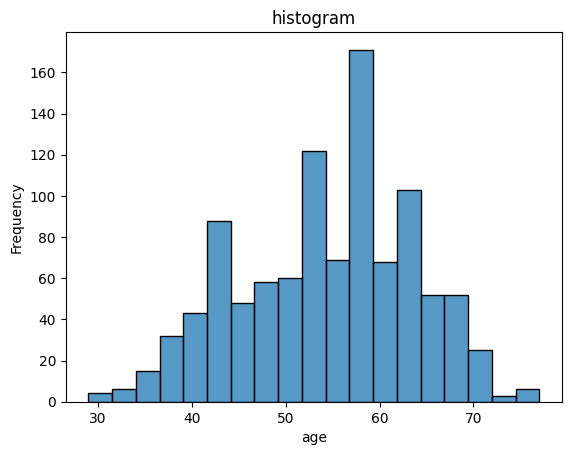

In [ ]:
plt.figure()
sns.histplot(
    data['age'],

)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('histogram')

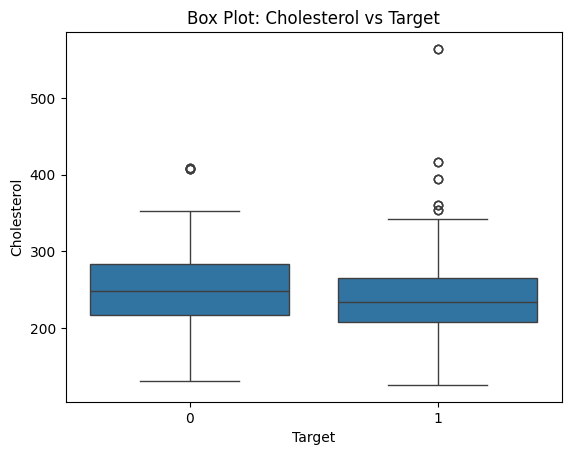

In [ ]:
plt.figure()
sns.boxplot(
    x='target',
    y='chol',
    data=data
)
plt.xlabel("Target")
plt.ylabel("Cholesterol")
plt.title("Box Plot: Cholesterol vs Target")
plt.show()


In [ ]:
# Separate input features (X) and target variable (y)
# Split the dataset into training and testing sets

X = data.drop('target', axis = 1)
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train
# X_test
# y_test
# y_train

In [ ]:
# Scale features to improve model performance

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [ ]:
# Train the Logistic Regression model


model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


# 5) USER INPUT
print("Please enter patient details:")

age = float(input("Age: "))
sex = int(input("Sex (1 = Male, 0 = Female): "))
cp = int(input("Chest Pain type (0-3): "))
trestbps = float(input("Resting Blood Pressure: "))
chol = float(input("Cholesterol: "))
fbs = int(input("Fasting Blood Sugar > 120 (1 = Yes, 0 = No): "))
restecg = int(input("Rest ECG (0-2): "))
thalach = float(input("Max Heart Rate achieved: "))
exang = int(input("Exercise induced angina (1 = Yes, 0 = No): "))
oldpeak = float(input("Oldpeak: "))
slope = int(input("Slope (0-2): "))
ca = int(input("Number of major vessels (0-3): "))
thal = int(input("Thal (1 = Normal, 2 = Fixed, 3 = Reversible): "))


# 6) Convert input to DataFrame
user_data = pd.DataFrame([[
    age, sex, cp, trestbps, chol, fbs,
    restecg, thalach, exang, oldpeak,
    slope, ca, thal
]], columns=X.columns)


# 7) Scale user data
user_data_scaled = scalar.transform(user_data)


# 8) Prediction
prediction = model.predict(user_data_scaled)

# 9) Result
if prediction[0] == 1:
    print("⚠️ Result: Heart Disease PRESENT")
else:
    print("✅ Result: Heart Disease NOT present")

Please enter patient details:
Age: 15
Sex (1 = Male, 0 = Female): 0
Chest Pain type (0-3): 2
Resting Blood Pressure: 55
Cholesterol: 55
Fasting Blood Sugar > 120 (1 = Yes, 0 = No): 1
Rest ECG (0-2): 2
Max Heart Rate achieved: 56
Exercise induced angina (1 = Yes, 0 = No): 0
Oldpeak: 56
Slope (0-2): 2
Number of major vessels (0-3): 0
Thal (1 = Normal, 2 = Fixed, 3 = Reversible): 3
✅ Result: Heart Disease NOT present


In [ ]:
# Calculate model accuracy

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


# Evaluate model performance using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Model Accuracy: 0.7951219512195122
Confusion Matrix:
 [[73 29]
 [13 90]]


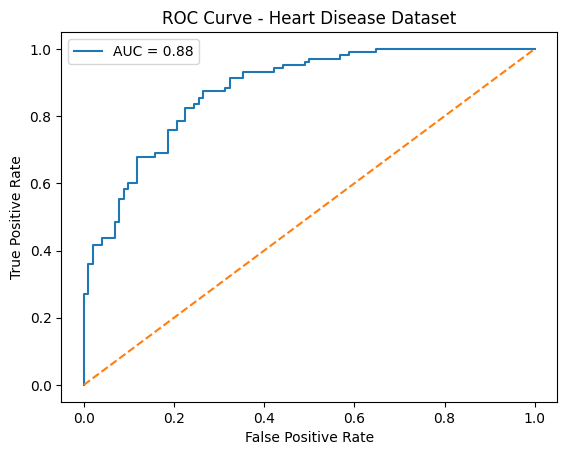

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Heart Disease Dataset")
plt.legend()
plt.show()


In [ ]:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

feature_importance = feature_importance.sort_values(
    by='Coefficient', ascending=False
)

print(feature_importance)


     Feature  Coefficient
2         cp     0.885835
7    thalach     0.652826
10     slope     0.343605
6    restecg     0.140804
0        age    -0.006734
5        fbs    -0.062685
3   trestbps    -0.320053
8      exang    -0.420235
4       chol    -0.447276
12      thal    -0.656856
9    oldpeak    -0.765406
1        sex    -0.835665
11        ca    -0.847522
